Found 16 files.
Parsing signal type 'DS' in file 'results_56234.txt' with kappa 56234
  Unexpected metric line in results_56234.txt: Comparison for behavior_distances_kappa_scan_3_56234.pkl:
  Spearman coefficient: 0.373
  P-value: 7.856e-16
  Mantel coefficient: 0.373
Parsing signal type 'VS' in file 'results_56234.txt' with kappa 56234
  Unexpected metric line in results_56234.txt: Comparison for behavior_distances_kappa_scan_3_56234.pkl:
  Spearman coefficient: 0.6
  P-value: 7.047e-44
  Mantel coefficient: 0.6
Parsing signal type 'DS' in file 'results_3162277.txt' with kappa 3162277
  Unexpected metric line in results_3162277.txt: Comparison for behavior_distances_kappa_scan_3_3162277.pkl:
  Spearman coefficient: 0.372
  P-value: 1.052e-15
  Mantel coefficient: 0.372
Parsing signal type 'VS' in file 'results_3162277.txt' with kappa 3162277
  Unexpected metric line in results_3162277.txt: Comparison for behavior_distances_kappa_scan_3_3162277.pkl:
  Spearman coefficient: 0.003
  P-v

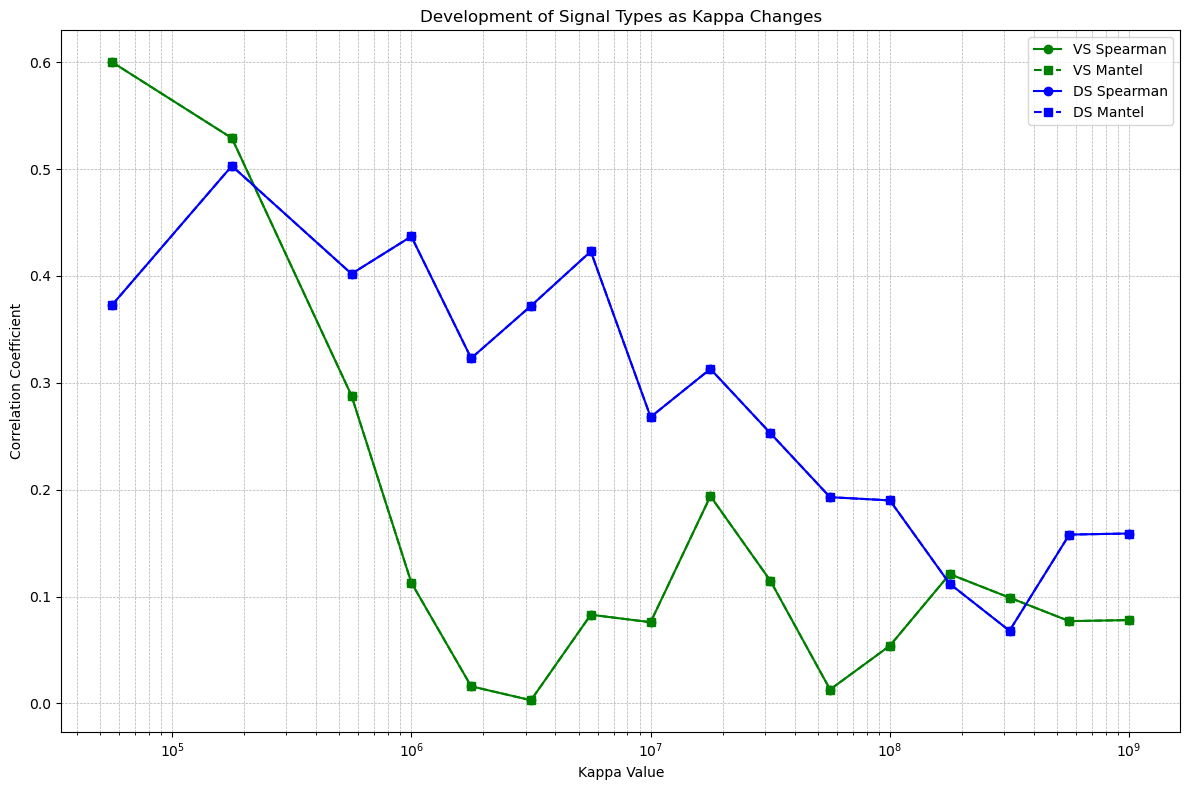

In [3]:
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np

# Directory containing your result files
directory = "/Users/fsp585/Desktop/GetherLabCode/Openfield/syllable_root/"

# Pattern to match your result files
file_pattern = os.path.join(directory, "results_*.txt")

# Get all matching files
files = glob.glob(file_pattern)

if not files:
    print("No files found matching the pattern.")
else:
    print(f"Found {len(files)} files.")

# Initialize a dictionary to hold all data
data = {}

# Regular expression to extract kappa value from filename
kappa_regex = re.compile(r'results_(\d+)\.txt')

# Iterate over each file
for file in files:
    # Extract kappa value from the filename
    filename = os.path.basename(file)
    match = kappa_regex.search(filename)
    if match:
        kappa_value = int(match.group(1))
    else:
        print(f"Could not extract kappa value from {filename}")
        continue  # Skip if kappa value is not found

    # Initialize data storage for this kappa
    data[kappa_value] = {}

    with open(file, 'r') as f:
        lines = f.readlines()

    i = 0
    while i < len(lines):
        line = lines[i].strip()

        # Check for signal type
        if line.startswith("Processing signal type:"):
            signal_type = line.split(":")[1].strip()
            print(f"Parsing signal type '{signal_type}' in file '{filename}' with kappa {kappa_value}")
            # Initialize a dict for this signal type
            data[kappa_value][signal_type] = {}

            # Skip 'Loaded ...' and 'Top syllables ...' lines
            i += 3  # Assuming exactly 3 lines

            # Next line is 'Comparison for ...'
            if i >= len(lines):
                print(f"Unexpected end of file in {filename} after signal {signal_type}")
                break

            # Skip 'Comparison for ...' line
            i += 1

            # Now, parse the next 4 lines for metrics
            metrics = {}
            for _ in range(4):
                if i >= len(lines):
                    print(f"Unexpected end of file in {filename} while reading metrics for {signal_type}")
                    break
                metric_line = lines[i].strip()
                # Parse metric
                if metric_line.startswith("Spearman correlation coefficient:"):
                    match = re.search(r'Spearman correlation coefficient:\s+([-\d\.e]+)', metric_line)
                    if match:
                        metrics['spearman_coeff'] = float(match.group(1))
                        print(f"  Spearman coefficient: {metrics['spearman_coeff']}")
                    else:
                        metrics['spearman_coeff'] = None
                        print(f"  Failed to parse Spearman coefficient in {filename}")
                elif metric_line.startswith("P-value:"):
                    match = re.search(r'P-value:\s+([-\d\.e]+)', metric_line)
                    if match:
                        metrics['p_value'] = float(match.group(1))
                        print(f"  P-value: {metrics['p_value']}")
                    else:
                        metrics['p_value'] = None
                        print(f"  Failed to parse P-value in {filename}")
                elif metric_line.startswith("Mantel test correlation coefficient:"):
                    match = re.search(r'Mantel test correlation coefficient:\s+([-\d\.e]+)', metric_line)
                    if match:
                        metrics['mantel_coeff'] = float(match.group(1))
                        print(f"  Mantel coefficient: {metrics['mantel_coeff']}")
                    else:
                        metrics['mantel_coeff'] = None
                        print(f"  Failed to parse Mantel coefficient in {filename}")
                elif metric_line.startswith("Mantel test P-value:"):
                    match = re.search(r'Mantel test P-value:\s+([-\d\.e]+)', metric_line)
                    if match:
                        metrics['mantel_p_value'] = float(match.group(1))
                        print(f"  Mantel P-value: {metrics['mantel_p_value']}")
                    else:
                        metrics['mantel_p_value'] = None
                        print(f"  Failed to parse Mantel P-value in {filename}")
                else:
                    print(f"  Unexpected metric line in {filename}: {metric_line}")
                i += 1

            # Store metrics
            data[kappa_value][signal_type] = metrics
        else:
            i += 1

# Check if data was loaded
if not data:
    print("No data was loaded.")
else:
    print(f"Loaded data for {len(data)} kappa values.")

# Sort kappa values for plotting
kappa_values = sorted(data.keys())

# Identify all signal types
signal_types = set()
for kappa in data.values():
    signal_types.update(kappa.keys())

print(f"Found signal types: {signal_types}")

# Prepare data for plotting
plot_data = {}
for signal in signal_types:
    plot_data[signal] = {'kappa': [], 'spearman': [], 'mantel': []}
    for kappa in kappa_values:
        metrics = data[kappa].get(signal)
        if metrics:
            plot_data[signal]['kappa'].append(kappa)
            plot_data[signal]['spearman'].append(metrics.get('spearman_coeff'))
            plot_data[signal]['mantel'].append(metrics.get('mantel_coeff'))

# Verify data
for signal, metrics in plot_data.items():
    print(f"\nSignal type: {signal}")
    print(f"Kappa values: {metrics['kappa']}")
    print(f"Spearman coefficients: {metrics['spearman']}")
    print(f"Mantel coefficients: {metrics['mantel']}")

# Plotting
plt.figure(figsize=(12, 8))

markers = {'spearman': 'o', 'mantel': 's'}
colors = {'DS': 'blue', 'VS': 'green'}

for signal, metrics in plot_data.items():
    if metrics['kappa']:
        plt.plot(metrics['kappa'], metrics['spearman'], marker=markers['spearman'], label=f"{signal} Spearman", color=colors.get(signal, 'black'))
        plt.plot(metrics['kappa'], metrics['mantel'], marker=markers['mantel'], linestyle='--', label=f"{signal} Mantel", color=colors.get(signal, 'black'))
    else:
        print(f"No data to plot for signal type '{signal}'.")

plt.xlabel('Kappa Value')
plt.ylabel('Correlation Coefficient')
plt.title('Development of Signal Types as Kappa Changes')
plt.legend()
plt.xscale('log')  # Use logarithmic scale for kappa
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

# Optionally, save the plot to a file
output_plot = os.path.join(directory, "kappa_development_plot.png")
plt.savefig(output_plot)
print(f"\nPlot saved to {output_plot}")

# Display the plot
plt.show()
